## 时间序列
时间序列是指将某种现象某一个统计指标在不同时间上的各个数值，按时间先后顺序排列而形成的序列。 在军事科学，空间科学，农牧业、气象预测、金融分析，工业自动化等领域有很多应用。 用t表示所观察的时间，Y表示观察值，则$Y_i$( i =1, 2, …, n)为时间$t_i$上的观察值。 

时间序列可以分为平稳序列和非平稳序列两大类。非平稳序列是包含趋势、季节性或周期性的序列，又可以分为有趋势的序列、有趋势和季节性的序列、几种成分混合而成的复合型序列。

一般时间序列的成分可以分为4种，即趋势( T )、季节性( S )、周期性( C )、随机性( I )：

- 趋势：是指标值在较长时期内持续上升或是持续下降的变化，所以是宏观、长期、持续性的作用力，比如我国房地产价格；

- 周期：也称循环波动，是时间序列中呈现出来的围绕长期趋势的一种波浪形或震荡式变动。比如商品价格在较短时间内，围绕某个均值上下波动；

- 季节：季节性是一年内重复出现的周期性波动，变化规律相对固定，比如旅游旺季和淡季，那么相对应，国内航班的旅客数、高速公路通过数、门票销售量都有一个周期波动。“季节”不一定按年计。每周、每天的不同时段的规律，也可称作季节性。

- 随机：就是不确定性，也称不规则波动，除了上面三个固定特性，剩下表现的就是随机性。比如10分钟内A股的股指变化，也是人们常说的随机过程(Stochastic Process）  

## 主流时间序列算法：
自回归、移动平均和整合模型

###  AR（auto-regressive）模型

亦即是自回归模型，原理是t时刻的值可以用自己t时刻前面的值来做回归预测，而一般的回归是预测其它测试值，所以这里叫自回归。
 $x_t = w_0+ w_1{x}_{t-1}+w_2{x}_{t-2}+...+w_p{x}_{t-p}+b$  
 $b$是均值为0，方差为$\sigma^2$ 的白噪声序列。   
另外还有加强的ARMA , ARIMA等。

### MA (moving average) 模型
移动平均法是通过对时间序列逐期递移求得平均数作为预测值的一种预测方法，其方法有简单移动平均法和加权移动平均法两种。
简单移动平均是将最近的k期数据加以平均，作为下一期的预测值。

### 还有其他的方法：  
Selecting P and Q using AIC  
ETS  
Prophet  
UCM  
以及层次法比如  
Bottom's up  
AHP  
PHA  
FP  
以及最近很多测试在如股市等数据上表现更优的多维长短时期记忆深度神经网络

### fbprophet：时间序列开源模型！

脸书开源的预言家地址，https://facebook.github.io/prophet/  
专门用于各式大规模时间序列分析的模型，基于加性模型（Additive Model），利用年月日等的周期性再加上假期影响去拟合非线性的趋势。

Prophet的优势
Prophet的大致原理如下，它将一个时间序列看成是三部分的组合：趋势，季节和假日。然后利用整合模型，将三个元素分解为三个线性拟合的三个加项，将序列问题映射为曲线拟合的问题。 
 
 
并不是所有问题都可以用同样的程序解决。Prophet数据有一下特点：

- 按小时、日、周的观测值，至少是几个月的历史数据（最好是一年）；
- 多种和人类活动相关的强周期性：比如每周的某日，一年中的某个时间；
- 按不确定间隔出现，已知的重要节假日，比如超级碗（Super Bowl)；
- 合理数量的空白观测值或异常值；
- 时间趋势会转折，比如新产品发布；
- 非线性增长的趋势，比如到达了某种自然局限或饱和。  
 
prophet有以下优势： 
- 可拓展：曲线拟合问题可以很轻易的引入季节和多周期性的影响，可以应用于多种数据类型；
- 数据灵活：与ARIMA模型不同，曲线拟合问题不需要数据等步长，所以不需要对数据进行一些特殊操作（如插值）；
- 速度快：相比较于传统的训练模型，曲线拟合的速度更快，有助于数据科学家进行迭代；
- 变量易解释：模型的大部分变量都有着明确的物理含义，并且拥有一定数据分析经验的人可以很快的将背景知识转换为新的参数引入模型。


In [3]:
# Command for plotting in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

prophet安装
主要适合mac和linux环境安装，windows需要可能需要anaconda比较好，容易安装失败
* pip install quandl获取数据集
* pip install fbprophet数据分析工具   
直接下载地址 https://pypi.python.org/pypi/fbprophet/  python setup.py install；  
有可能缺少些包会报错，比如pystan、lunarcalendar、convertdate等

* 谷歌趋势数据  pip install pytrends  

使用储存器，相当于一个实现stock操作的类：
首先从github上将stocker.py下载好，和准备好的项目文件放在一个目录下。然后在文件中调用这个Stocker。

In [2]:
import fbprophet
#from stocker import Stocker


ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
#获取相关股票
microsoft = Stocker('MSFT')

获取微软股票数据，看下有什么字段和类型

In [ ]:
#Prophet模型对输入有所限制，接受的是DataFrame格式的输入，并且时间数据列名为ds，观测数据列名为y
stock_history = microsoft.stock
stock_history.head()


## 看下收盘价数据情况

Maximum Adj. Close = 91.90 on 2018-01-23.
Minimum Adj. Close = 0.06 on 1986-03-24.
Current Adj. Close = 91.90 on 2018-01-23.



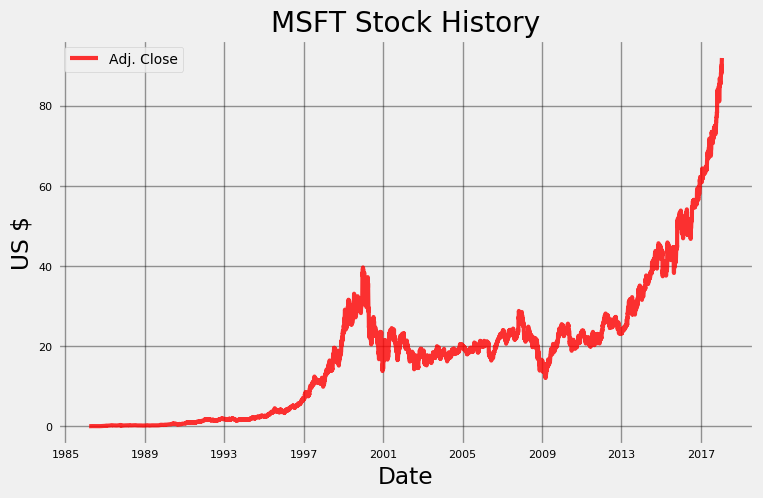

In [7]:
microsoft.plot_stock()

## 再来看一下Daily Change

Maximum Daily Change = 2.08 on 2008-10-13.
Minimum Daily Change = -3.34 on 2017-12-04.
Current Daily Change = 1.61 on 2018-01-22.

Maximum Adj. Volume = 591052200.00 on 2006-04-28.
Minimum Adj. Volume = 7425503.00 on 2017-11-24.
Current Adj. Volume = 23190700.00 on 2018-01-22.



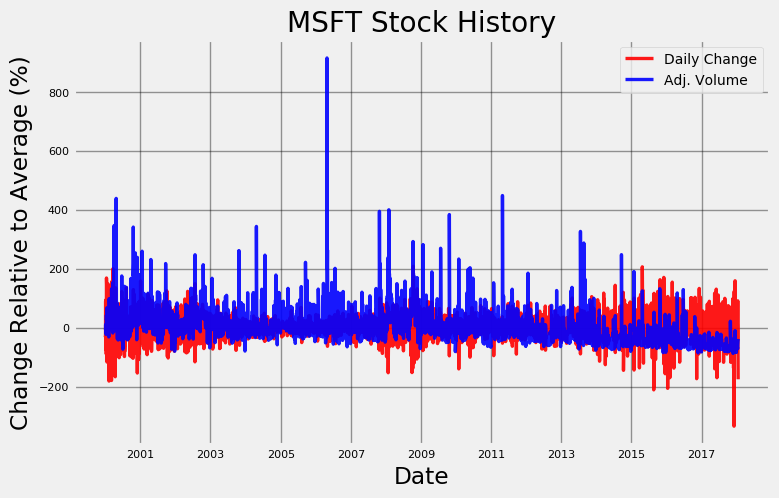

In [6]:
microsoft.plot_stock(start_date = '2000-01-03', end_date = '2018-01-16', 
                     stats = ['Daily Change', ' '], plot_type='pct')

## 盈利的情况，假如买了100万股，我现在就不录课了。。。

MSFT Total buy and hold profit from 1986-03-13 to 2018-01-16 for 100 shares = $8829.11


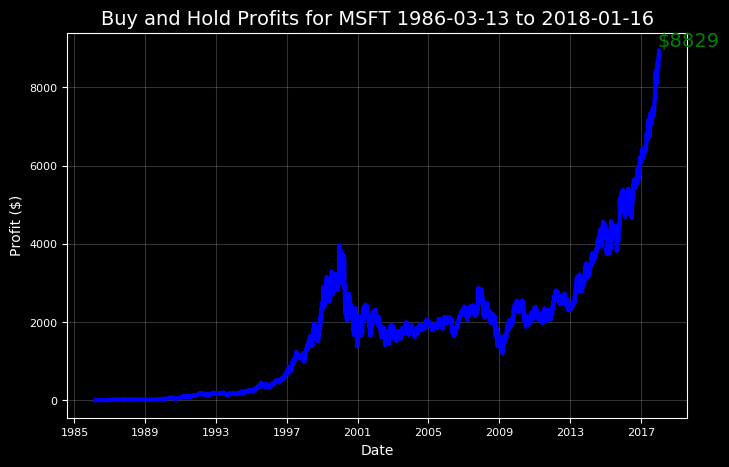

In [8]:
microsoft.buy_and_hold(start_date='1986-03-13', end_date='2018-01-16', nshares=100)

要是运气不好。。。就白玩了！

MSFT Total buy and hold profit from 1999-01-05 to 2002-01-03 for 100 shares = $-56.92


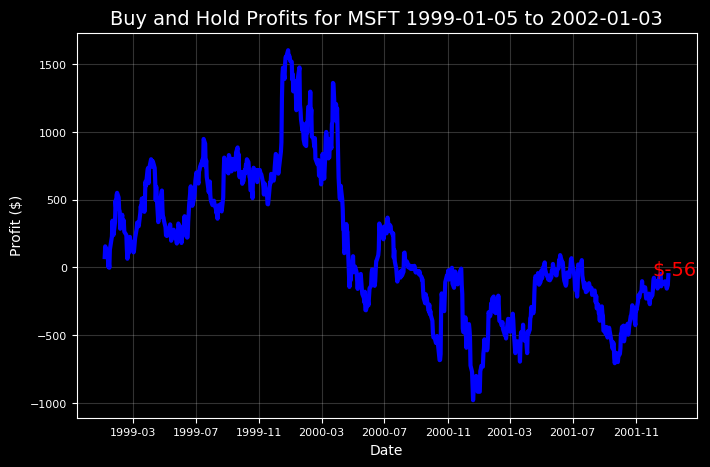

In [9]:
microsoft.buy_and_hold(start_date='1999-01-05', end_date='2002-01-03', nshares=100)

## prophet登场了

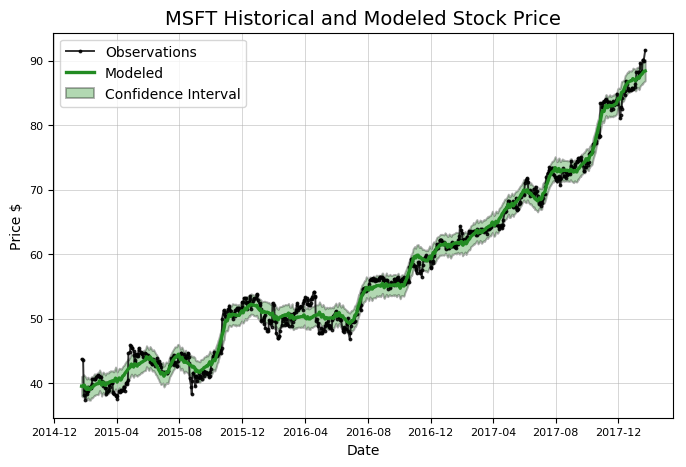

In [9]:
model, model_data = microsoft.create_prophet_model()

## 趋势情况

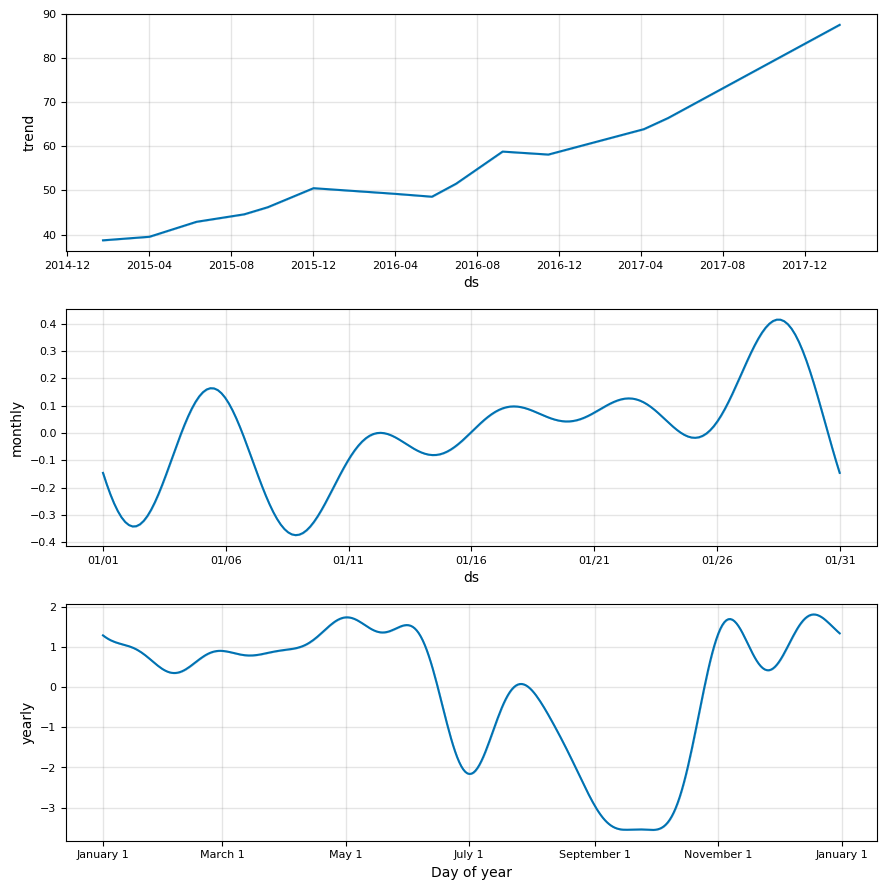

In [10]:
model.plot_components(model_data)
plt.show()

过去三年，总的趋势显然是向上的。一年的趋势似乎是七月、九月和十月下降，十二月和一月最大增幅。每个月底的时候还是消停的吧！

好像这里面还没显示出星期的趋势，咱们给它加进去

In [11]:
print(microsoft.weekly_seasonality)
microsoft.weekly_seasonality = True
print(microsoft.weekly_seasonality)

False
True


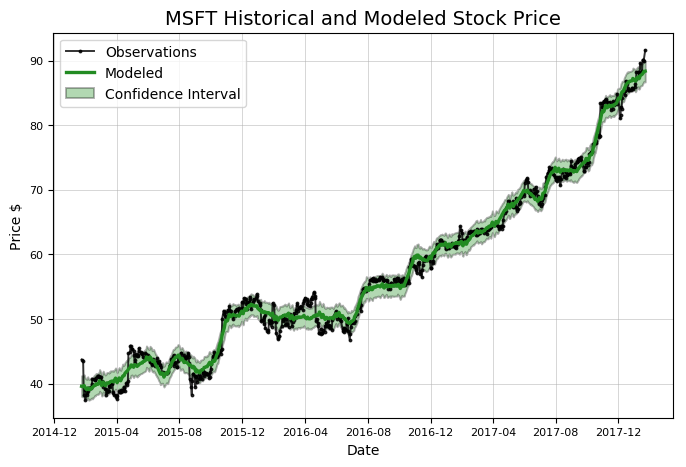

In [12]:
model, model_data = microsoft.create_prophet_model(days=0)

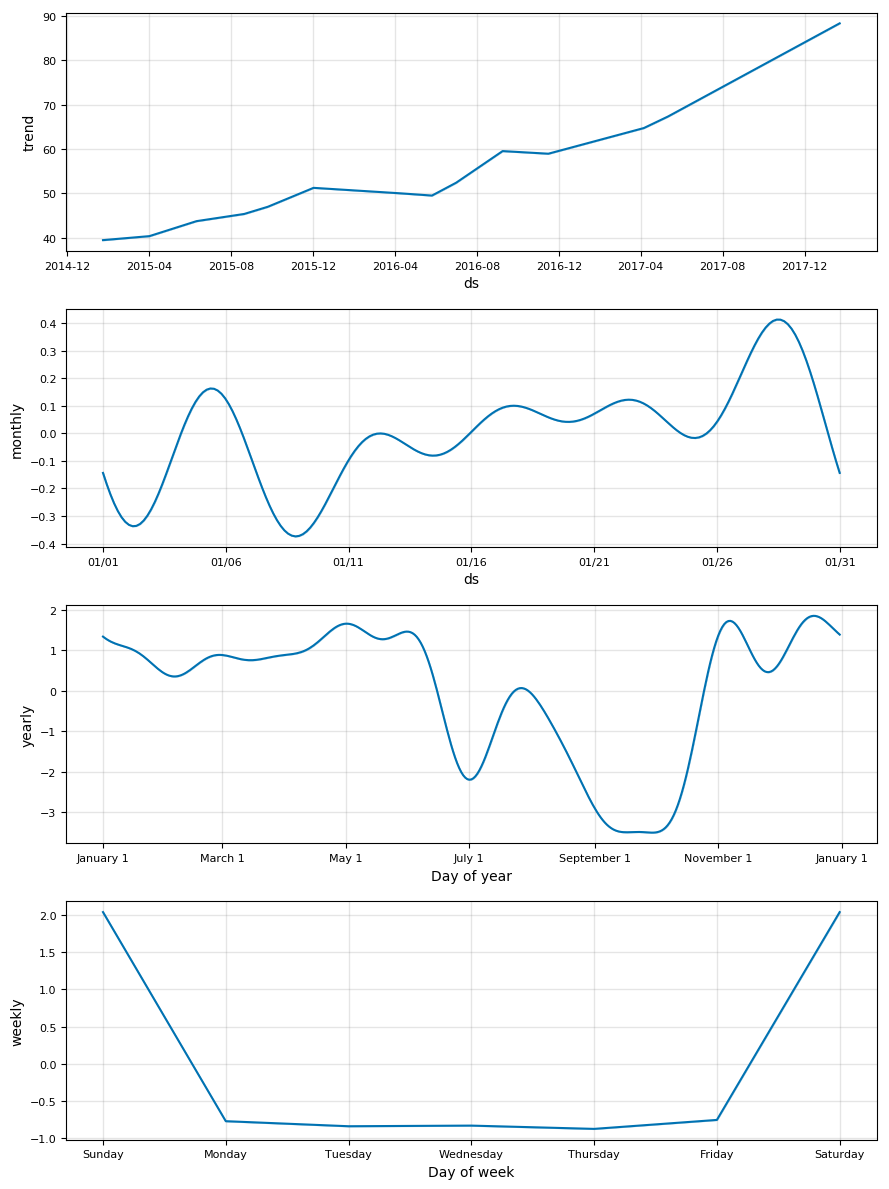

In [13]:
model.plot_components(model_data)
plt.show()

股票是不是只能工作日买啊，那就是没啥变化啊

In [11]:
# Turn off the weekly seasonality because it clearly did not work! 
microsoft.weekly_seasonality=False

## 突变点

这里可以找到一些突变点（可以观察二阶导）


Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
410 2016-09-08   55.811396 -1.378093
338 2016-05-26   50.113453  1.116720
217 2015-12-02   52.572008 -0.882359
458 2016-11-15   57.589819  0.603127
48  2015-04-02   37.612590  0.442776


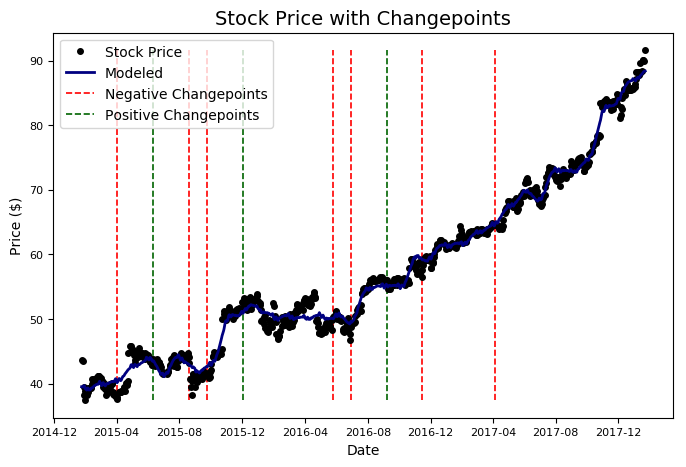

In [15]:
microsoft.changepoint_date_analysis()

# 预测

Predicted Price on 2018-07-21 = $102.40


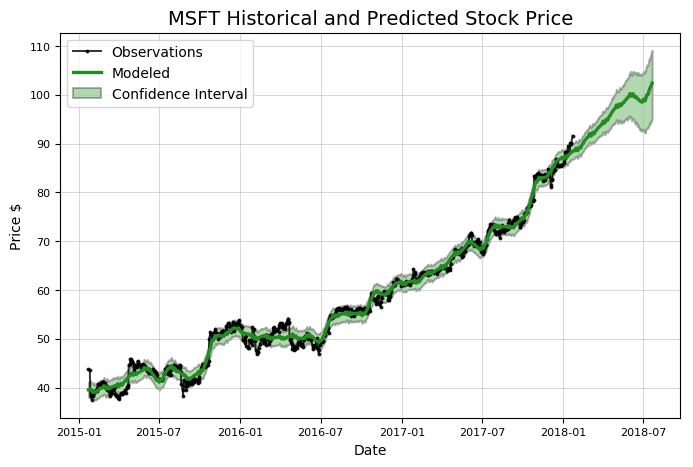

In [18]:
model, future = microsoft.create_prophet_model(days=180)